# Titanic Survival Predictions

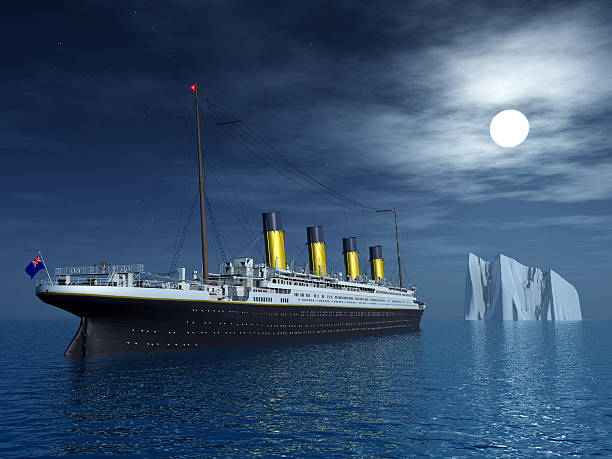

#### From the Titanic Kaggle challenge located here:
    
[Click here](https://www.kaggle.com/c/titanic/overview) 

---

### The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

***In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).***

### About the dataset

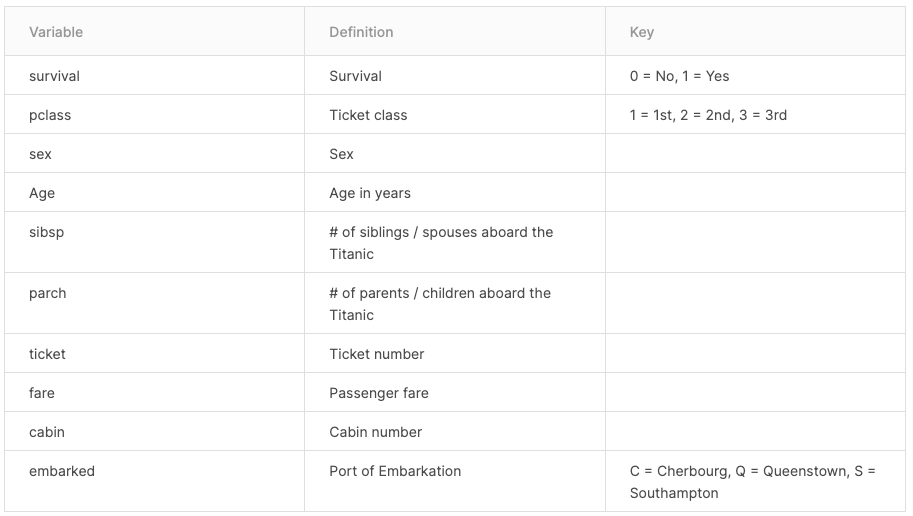

**Variable Notes**

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

#### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', palette='ocean', rc={'figure.figsize':(18,13)})
#sns.set(rc={'figure.figsize':(18,13)})
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, date

In [2]:
# Read in the data files
training_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [3]:
# Make a copy of the data
train = training_df.copy()
test = test_df.copy()

## **Explore the data**

In [4]:
# Show top 5 of train data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# Top 5 rows of test data
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**The test data is purposefully missing a column compared to the training data as it will be up our model to try and guess if the passenger survived.**

In [6]:
training_size = train.shape
test_size = test.shape

print("The size of the training data is:")
print(training_size)

print("The size of the test data is:")
print(test_size)

The size of the training data is:
(891, 12)
The size of the test data is:
(418, 11)


In [7]:
# General statistics of dataset
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
# Look at the columns along with missing values and data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
# Look at the columns along with missing values and data types
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


**Multiple values are missing from both dataset in the 'Age' and 'Cabin' features. A couple from 'Embarked' in the training data as well.**

In [10]:
missing_train_data = pd.isnull(train['Age'])

In [11]:
train[missing_train_data]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


## Age
#### Age Distribution

<AxesSubplot:xlabel='Age', ylabel='Count'>

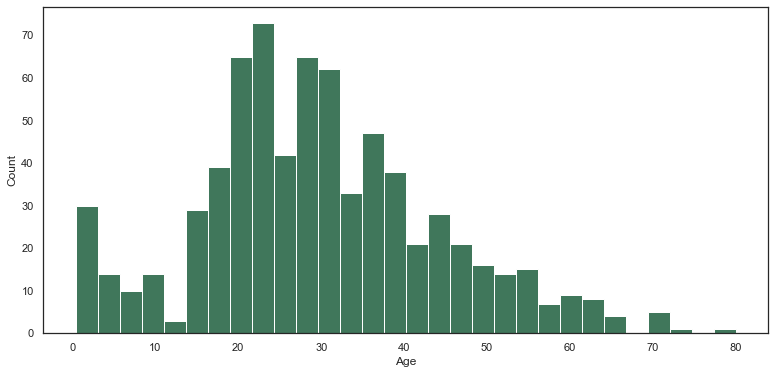

In [12]:
plt.figure(figsize=(13,6))
sns.histplot(data=train, x='Age', bins=30)

#### Find average age

In [13]:
average_age = train['Age'].mean()
print("The average age on the titanic was",average_age)

The average age on the titanic was 29.69911764705882


#### Average age of each Sex

In [14]:
avg_age_of_sex = train.groupby('Sex').Age.mean()
avg_age_of_sex

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [15]:
print('The oldest passenger on the titanic was', train['Age'].max(),'years old.')
print('The youngest passenger on the titanic was', train['Age'].min(),'years old.')
print('The average age of passengers on the titanic was', train['Age'].mean(),'years old.')

The oldest passenger on the titanic was 80.0 years old.
The youngest passenger on the titanic was 0.42 years old.
The average age of passengers on the titanic was 29.69911764705882 years old.


##### **We can break this down further by seperating this by male and female**

In [16]:
oldest_male = train[train['Sex']=='male']['Age'].max()
oldest_female = train[train['Sex']=='female']['Age'].max()
young_male = train[train['Sex']=='male']['Age'].min()
young_female = train[train['Sex']=='female']['Age'].min()
avg_male = train[train['Sex']=='male']['Age'].mean()
avg_female = train[train['Sex']=='female']['Age'].mean()

print('The oldest male on the titanic was', oldest_male, 'years old.')
print('The oldest female on the titanic was', oldest_female, 'years old.')
print('The youngest male on the titanic was', young_male, 'years old.')
print('The youngest female on the titanic was', young_female, 'years old.')
print('The average age for males on the titanic was', avg_male, 'years old.')
print('The average age for females on the titanic was', avg_female, 'years old.')

The oldest male on the titanic was 80.0 years old.
The oldest female on the titanic was 63.0 years old.
The youngest male on the titanic was 0.42 years old.
The youngest female on the titanic was 0.75 years old.
The average age for males on the titanic was 30.72664459161148 years old.
The average age for females on the titanic was 27.915708812260537 years old.


Distrubtion of surviving between males and females based on age.


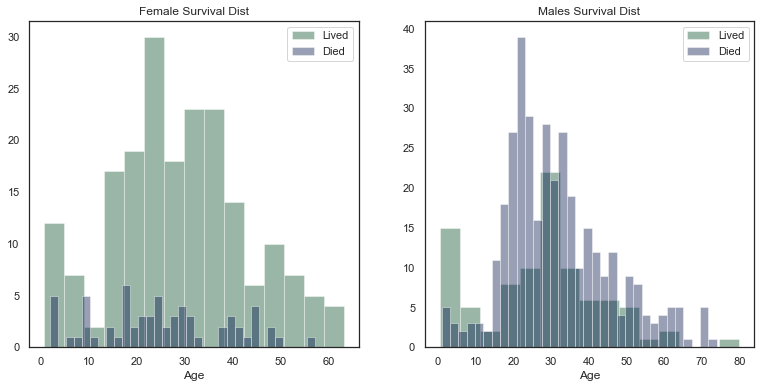

In [17]:
lived = 'Lived'
died = 'Died'
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,6))
females = train[train['Sex'] == 'female']
males = train[train['Sex'] == 'male']
ax = sns.distplot(females[females['Survived']==1].Age, bins=15,
                  label=lived, ax=axes[0], kde=False)
ax = sns.distplot(females[females['Survived']==0].Age, bins=33,
                  label=died, ax=axes[0], kde=False)
ax.legend()
ax.set_title('Female Survival Dist')
ax = sns.distplot(males[males['Survived']==1].Age, bins=15,
                  label=lived, ax=axes[1], kde=False)
ax = sns.distplot(males[males['Survived']==0].Age, bins=33,
                  label=died, ax=axes[1], kde=False)
ax.legend()
ax.set_title('Males Survival Dist')
print("Distrubtion of surviving between males and females based on age.")

**Remarks**

   - Woman have a much higher chance of survival than males overall
   - Young males between 0 - 15 do seem to have a good chance of living, compared to the older males

### Find the percentage of men and woman that survived

In [18]:
men_survived = train.loc[train['Sex']=='male']['Survived'].mean()*100
female_survived = train.loc[train['Sex']=='female']['Survived'].mean()*100

In [19]:
print("The percent of a male surviving the sinking was",  men_survived,  "%" )
print("The percent of a female surviving the sinking was",  female_survived,  "%")

The percent of a male surviving the sinking was 18.890814558058924 %
The percent of a female surviving the sinking was 74.20382165605095 %


Barplot the difference between the Sex and Surving features


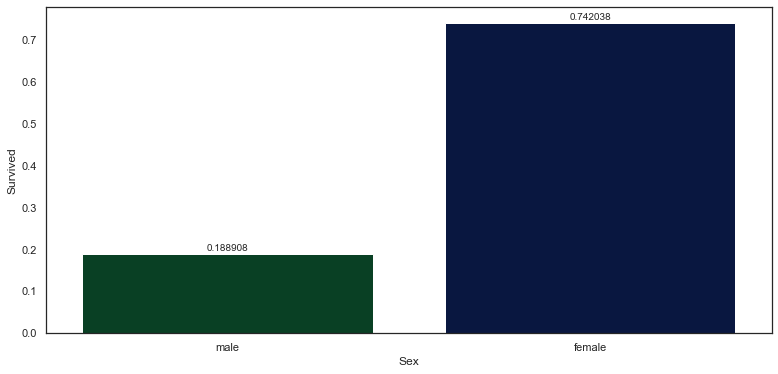

In [20]:
plt.figure(figsize=(13,6))
ax = sns.barplot(x='Sex', y='Survived', data=train, ci=None)
plt.bar_label(ax.containers[0], padding=1, label_type='edge') 
print("Barplot the difference between the Sex and Surving features")

**Remarks**:
 74% of women survived
 18% of males survived

### Look to see if Pclass has a correlation with surviving

In [21]:
# Top two rows of dataset
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<a id="0 - died"></a>

In [22]:
# Grouping by Pclass and Survived features
surviving_data = train.groupby(['Survived','Pclass']).size()
surviving_data

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

Lets view that data in a nicer format, using a crosstab similar to a pivot table.

In [23]:
pd.crosstab([train.Sex,train.Survived], train.Pclass, margins=True).style.background_gradient(cmap='coolwarm')

In [24]:
upper_class = train.loc[train['Pclass']==1]['Survived'].mean()*100
middle_class = train.loc[train['Pclass']==2]['Survived'].mean()*100
lower_class = train.loc[train['Pclass']==3]['Survived'].mean()*100

Percentage of upper class(Pclass 1) surviving was 62.96296296296296 %
Percentage of middle class(Pclass 2) surviving was 47.28260869565217 %
Percentage of lower class(Pclass 3) surviving was 24.236252545824847 %


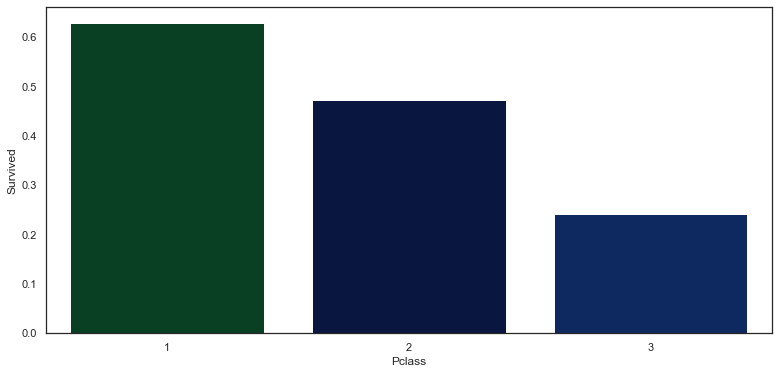

In [25]:
# Bar plot of surviving by Pclass
plt.figure(figsize=(13,6))
sns.barplot(x='Pclass', y='Survived', data=train, ci=None)
print("Percentage of upper class(Pclass 1) surviving was",upper_class,"%")
print("Percentage of middle class(Pclass 2) surviving was",middle_class,"%")
print("Percentage of lower class(Pclass 3) surviving was",lower_class,"%")

This tells us the higher class the greater chance of survival.
Lets visualize some of this data to get a better understanding

Difference between being a male and female on the titanic,
when it came to making it off safely.


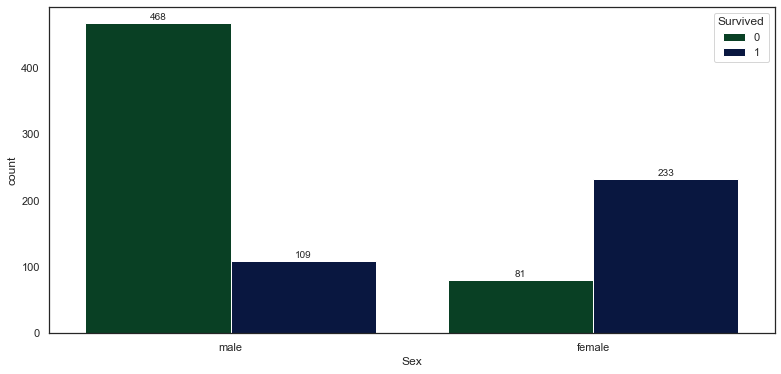

In [26]:
plt.figure(figsize=(13,6))
ax = sns.countplot(x='Sex', hue='Survived', data=train)
plt.bar_label(ax.containers[0], padding=1,label_type='edge') 
plt.bar_label(ax.containers[1], padding=1, label_type='edge') 
print("Difference between being a male and female on the titanic,\nwhen it came to making it off safely.")

**Remarks**:

 - 468 males died compared to 81 woman on the titanic


**Remarks**:

   - Survival odds for whether you have sibling or a spouse aboard the titanic with you.   
   - Women still had the highest odds here in every variation.
     The number doesnt really seem to matter here for surviving, it just appears getting woman safe was top prioity

---

### 'Parch' feature 

In [27]:
# Pivot table with Survived, Pclass and Parch features
table = pd.pivot_table(train, values=['Parch'], index=['Survived','Pclass'],
                      aggfunc=len).style.background_gradient(cmap='coolwarm')
print('Pivot table showing the amount of values for Parch based of Survival and Pclass')
table

Pivot table showing the amount of values for Parch based of Survival and Pclass


In [28]:
# We can break down further by looking at the Survival based on number of Parch feature
# Using a crosstab
pd.crosstab([train.Parch, train.Pclass], train.Survived, margins=True).style.background_gradient(cmap='coolwarm')

Barplot Parch vs Survived with hue of Sex


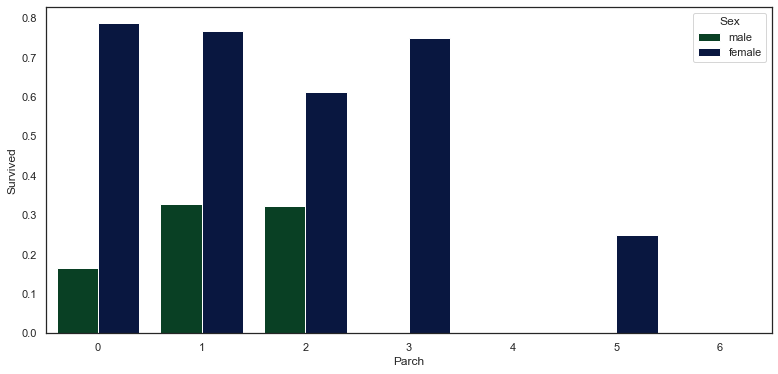

In [29]:
plt.figure(figsize=(13,6))
sns.barplot(x='Parch',y='Survived',hue='Sex', data=train, ci=None)
print("Barplot Parch vs Survived with hue of Sex")

<Figure size 936x432 with 0 Axes>

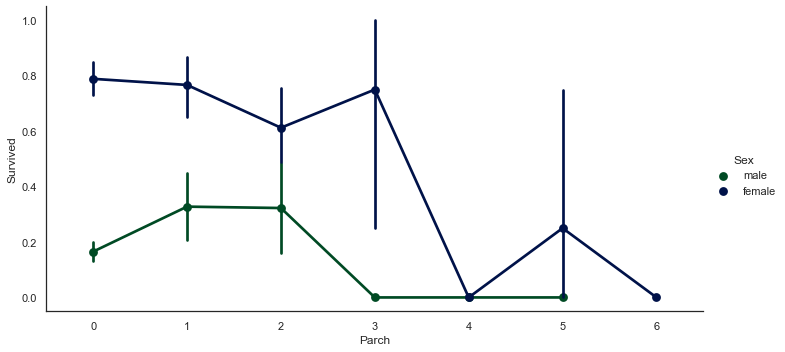

In [30]:
# Lets try to look at this data in different way using a catplot.
plt.figure(figsize=(13,6))
sns.catplot(x='Parch',y='Survived', hue='Sex',data=train, kind='point',
           height=5, aspect=2)

**Remarks**:

   - Most of the larger sized families were Pclass 3. Due to volume of 3rd class, alot of the deaths were from Pclass 3 with no family
   - This graph represents 1 as survivng and 0 and dying, you can see that having woman survive came first.
   - Having 1-3 for the Parch feature appears to be the sweet spot for greater survival odds. 

### 'SibSp' feature

In [31]:
table = pd.pivot_table(train, values=['SibSp'], index=['Survived','Pclass'],
                      aggfunc=len).style.background_gradient(cmap='coolwarm')
print('Pivot table showing the amount of values for SibSp based of Survival and Pclass')
table

Pivot table showing the amount of values for SibSp based of Survival and Pclass


In [32]:
# SipSp
pd.crosstab([train.SibSp, train.Pclass], train.Survived, margins=True).style.background_gradient(cmap='coolwarm')

Barplot SibSp vs Survived with hue of Sex


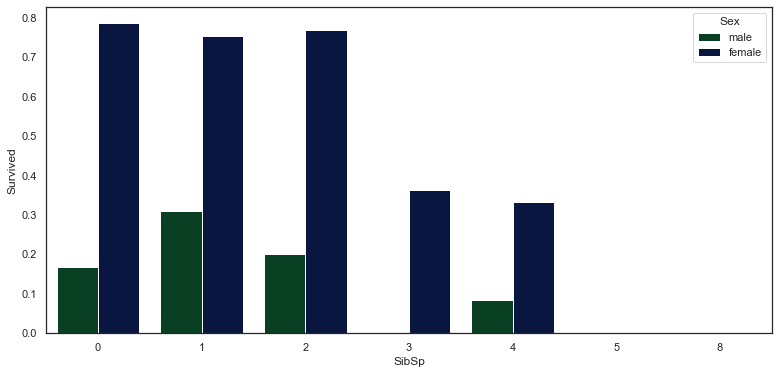

In [33]:
plt.figure(figsize=(13,6))
sns.barplot(x='SibSp',y='Survived',hue='Sex', data=train, ci=None)
print("Barplot SibSp vs Survived with hue of Sex")

<Figure size 1440x720 with 0 Axes>

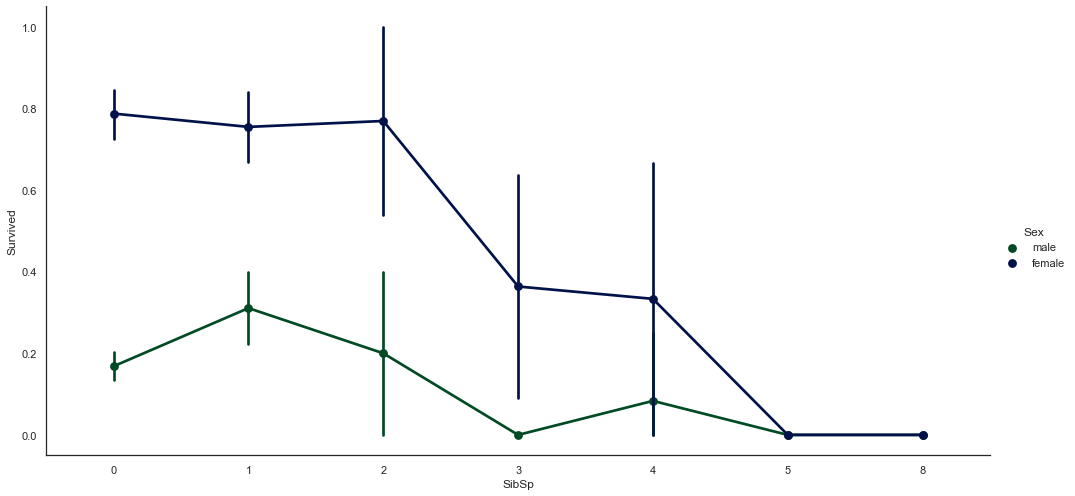

In [34]:
# Lets try to look at this data in different way using a catplot.
plt.figure(figsize=(20,10))
sns.catplot(x='SibSp',y='Survived', hue='Sex',data=train, kind='point',
           height=7, aspect=2)

**Remarks**:

  - The larger sized families most came from Pclass 3 just as the Parch feature also represented, in fact its very similiar to that feature.
  -  A decrease in Survival occurs as the number of SibSp increases.
  - Woman are closer to the "1" which means a higher percentage of living, still a decrease as the number of family increases

---

### 'Embarked' feature

#### Total amount of people on the titanic that survived

In [35]:
total_survived = train['Survived'].sum()
total_survived

342

Displaying the number of Embarked passengers and their class.


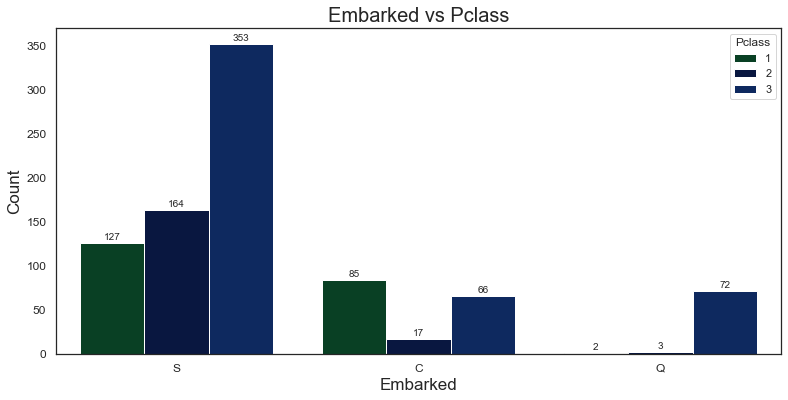

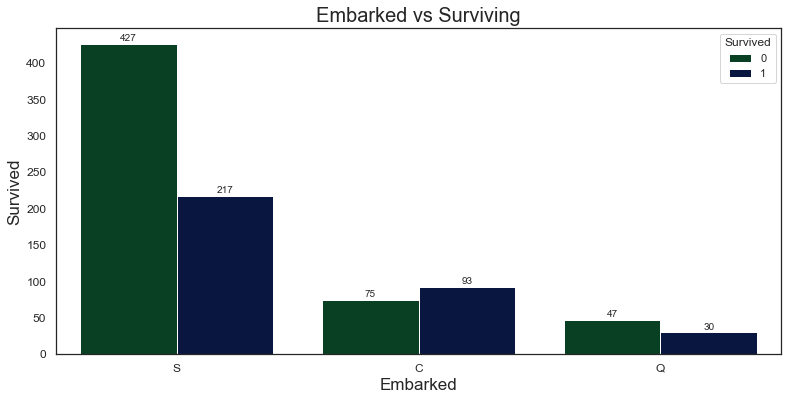

In [36]:
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.countplot(x=train['Embarked'],hue=train['Pclass'],order=train['Embarked'].value_counts(ascending=False).index)
values = train['Embarked'].value_counts(ascending=False).values
plt.bar_label(ax.containers[0], padding=1, label_type='edge')
plt.bar_label(ax.containers[1], padding=1, label_type='edge')
plt.bar_label(ax.containers[2], padding=1, label_type='edge')

plt.xlabel('Embarked', fontsize=17)
plt.xticks(rotation='horizontal', fontsize=12)

plt.ylabel('Count', fontsize=17)
plt.yticks(size=12)

plt.title('Embarked vs Pclass', fontsize=20)

fig, ax = plt.subplots(figsize=(13,6))
ax = sns.countplot(x=train['Embarked'], hue=train['Survived'],order=train['Embarked'].value_counts(ascending=False).index)
plt.bar_label(ax.containers[0], padding=1, label_type='edge')
plt.bar_label(ax.containers[1], padding=1, label_type='edge')

plt.xlabel('Embarked', fontsize=17)
plt.xticks(rotation='horizontal', fontsize=12)

plt.ylabel('Survived', fontsize=17)
plt.yticks(size=12)

plt.title('Embarked vs Surviving', fontsize=20)

print("Displaying the number of Embarked passengers and their class.")

**Remarks:**

   - Most of the deaths came from Southampton, not suprising from the shear volume they had compared to the other two cities.

## Note come back to this - can we divide the above and find averages???

Displaying the number of Embarked passengers and their class.


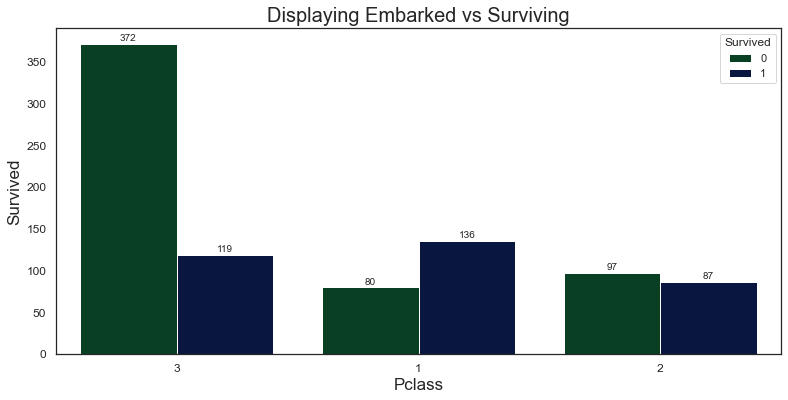

In [37]:
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.countplot(x=train['Pclass'], hue=train['Survived'],order=train['Pclass'].value_counts(ascending=False).index)
plt.bar_label(ax.containers[0], padding=1, label_type='edge')
plt.bar_label(ax.containers[1], padding=1, label_type='edge')

plt.xlabel('Pclass', fontsize=17)
plt.xticks(rotation='horizontal', fontsize=12)

plt.ylabel('Survived', fontsize=17)
plt.yticks(size=12)

plt.title('Displaying Embarked vs Surviving', fontsize=20)

print("Displaying the number of Embarked passengers and their class.")

---

### 'Fare' feature

In [38]:
# Basic statistics of column
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [39]:
print("The lowest Fare price was", train['Fare'].min(), "dollars.")
print("The highest Fare price was", train['Fare'].max(), "dollars.")
print("The average Fare price was", train['Fare'].mean(), "dollars.")

The lowest Fare price was 0.0 dollars.
The highest Fare price was 512.3292 dollars.
The average Fare price was 32.204207968574636 dollars.


In [40]:
fare_subset = train.loc[:, ['Pclass', 'Fare', 'Survived']]

# Group by Pclass and Survived and get Fare mean prices
fare_subset.groupby(['Pclass','Survived'], as_index=False).mean()

,Pclass,Survived,Fare
0,1,0,64.684007
1,1,1,95.608029
2,2,0,19.412328
3,2,1,22.055700
4,3,0,13.669364
5,3,1,13.694887


In [41]:
# Average price of Fare for each Sex based on surviving and not surviving
fare_sex_survived_avg = train.groupby(['Survived', 'Sex'])['Fare'].mean()
fare_sex_survived_avg.to_frame()

Fare
Survived Sex              
0        female  23.024385
         male    21.960993
1        female  51.938573
         male    40.821484

**This is pretty interesting but expected, the average ticket price double or more for the survivors. We can break this down even further to get better results by using the .describe() function

In [42]:
# Get an overview of the fare_sex_survived_avg_class dataframe
fare_overview = train.groupby(['Survived', 'Sex', 'Pclass'])['Fare'].describe()
fare_overview

count        mean         std      min       25%  \
Survived Sex    Pclass                                                     
0        female 1         3.0  110.604167   70.920264  28.7125  90.13125   
                2         6.0   18.250000    6.969577  10.5000  13.00000   
                3        72.0   19.773093   14.572275   6.7500   8.53125   
         male   1        77.0   62.894910   60.052545   0.0000  27.72080   
                2        91.0   19.488965   15.720548   0.0000  11.50000   
                3       300.0   12.204469   10.984904   0.0000   7.75000   
1        female 1        91.0  105.978159   74.738897  25.9292  57.48960   
                2        70.0   22.288989   11.140937  10.5000  13.00000   
                3        72.0   12.464526    5.984714   7.2250   7.75000   
         male   1        45.0   74.637320  101.091948  26.2875  29.70000   
                2        17.0   21.095100    9.832542  10.5000  13.00000   
                3        47.0   15.579696   15.232388   0.0000   7.82500   

                              50%         75%       max  
Survived Sex    Pclass                                   
0        female 1       151.55000  151.550000  151.5500  
                2        17.00000   24.750000   26.0000  
                3        14.47915   26.075025   69.5500  
         male   1        42.40000   77.287500  263.0000  
                2        13.00000   26.000000   73.5000  
                3         7.89580    9.500000   69.5500  
1        female 1        82.17080  134.075000  512.3292  
                2        23.00000   26.250000   65.0000  
                3         9.46875   15.912500   31.3875  
         male   1        35.50000   79.200000  512.3292  
                2        18.75000   26.000000   39.0000  
                3         8.05000   15.820850   56.4958

**Remarks**:

  - There is a trend where the more money you spent on Fare the better chances of Survival were, female Pclass 1 for not surviving(0) is slightly higher than living(1) but that has something to do with the count, 91 Pclass1 female lived while only three Pclass 1 females died.
  
 
 
 -  The overall count shows the males in Pclass 3 had by far the most amount of deaths, The Pclass 3 males that did survive had an average fair of about 3 dollars more than those who passed. Also, another interesting point is alot of Pclass 1 males did die, lots more than those who lived, the ones that did live had a average Fare of 12 more dollars.
 

 - As the Fare price increases so does the chance of survival as the higher Pclass's get the more expensive Fare.

### Summary of the Data

As stated before this data shows that the chance of survivng is much greater being a female. Another factor was age and class. Larger sized families came from the lower class which probably did not help the chances of surviving, even woman had a decrease in survivng for larger sized families. A higher Pclass certainly helped but a fair amount of men in highest class still did die. Also, as anyone would expect there was a trend for having a more expensive Fare ticket and living.

**Remarks**

 - As the Fare price increases so does the chance of survival as the higher Pclass's get the more expensive Fare.

### Correlations

In [43]:
# The corr() method
correlations = train.corr()

# Display results
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


**Thats rather difficult to interpert. Let's visualise in a heatmap with should provide us a clearer understanding of the correlations between features.**


#### What is a heatmap?

 A heatmap depicts values for a main variable of interest across two axis variables as a grid of colored squares. The axis variables are divided into ranges like a bar chart or histogram, and each cell’s color indicates the value of the main variable in the corresponding cell range.

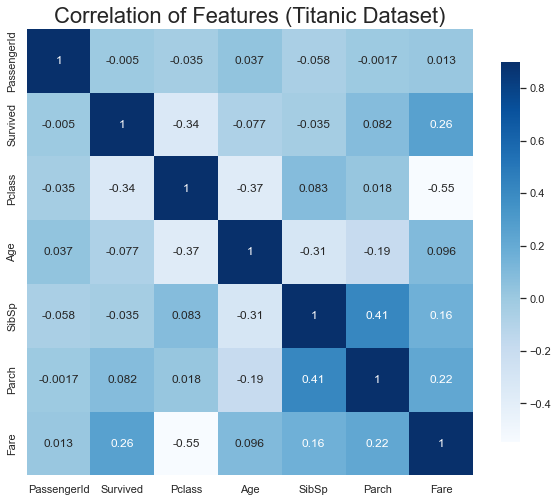

In [44]:
# Correlation heatmap of dataset

def corr_heatmap(train):
    
    ax = plt.figure(figsize=(10,10))
    mask = np.zeros_like(correlations, dtype = np.bool)
    mask[np.triu_indices_from(mask)] = False

    sns.heatmap(
        correlations,
        cmap='Blues',
        square=True,
        vmax=.9,
        annot=True,
        mask = mask,
        cbar_kws={'shrink': 0.7},
        annot_kws = {'fontsize':12})

    plt.title('Correlation of Features (Titanic Dataset)', size=22)

corr_heatmap(train)

#### Remarks

   ***How to Interpret the heatmap:****
   
  ***Ranges from 0-1 the closer to 1 the more of a positive correlation between the features have***
 

  - We see to begin with that only numeric features are applied in the heatmap
  - So our big feature, right now, 'Sex' is not included along with Ticket, Cabin and Embarked, I would imagine we will drop some of those or turn into numeric data later on.
  - Not much of strong correlations except between 'Parch' and 'Sibsp', which are both related to immediate family so not surprising, also a slight correlation with the Fare feature and Survived.

## Data Cleaning/Preprocessing

**Cleaning the data is crucial to make sure our model returns the best possible results, also setting the right column types with help with performance.**

In [45]:
# Viewing what we are working with
print("Training Set")
train.info()
print(" ")
print("Testing Set")
test.info()

Training Set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
 
Testing Set
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-nu

** Take note of those memory usages, well try and improve them when we fix column types later **

Change some column types, for example 'Age' to int, 'Sex' to categorical

In [46]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [47]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Both sets have multiple values missing from the same column. Train set also has 2 values missing from Embarked.

In [48]:
# Finding the percentages of missing values - Train set
rows, columns = train.shape
cell_count = rows * columns
num_of_cells = train.isnull().sum().sum()
percent_mia = (num_of_cells / cell_count) * 100
print(f"Percent of missing values in training set: {percent_mia}%")

Percent of missing values in training set: 8.099513655069211%


In [49]:
# Finding the percentages of missing values - Test set
rows, columns = test.shape
cell_count = rows * columns
num_of_cells = test.isnull().sum().sum()
percent_mia = (num_of_cells / cell_count) * 100
print(f"Percent of missing values in testing set: {percent_mia}%")

Percent of missing values in testing set: 9.00391474554154%


#### I think the best approach to filling the values in the missing age column(which I think will be the most important data cleaning step) is to seperate sex and pclass and find the mean. Then use that to replace the NaN values in 'Age'.

In [50]:
# View only missing 'Age' values in seperare dataframe
age_null = pd.isnull(train["Age"])
train[age_null]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [51]:
# See the ages of male and females based on Pclass
train.groupby(['Pclass', 'Sex'], as_index=False)['Age'].mean()

,Pclass,Sex,Age
0,1,female,34.611765
1,1,male,41.281386
2,2,female,28.722973
3,2,male,30.740707
4,3,female,21.750000
5,3,male,26.507589


**We will use the data above to fill in the missing values in the 'Age' column. This is the best method I could come up with to get accurate info.**

In [52]:
train['Age'] = train.groupby(['Pclass', 'Sex']).Age.apply(lambda x: x.fillna(x.mean()))

In [53]:
# Rerun age-null to verify this df has been populated with values correctly.
train[age_null]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,26.507589,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,30.740707,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,21.750000,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,26.507589,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,21.750000,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,26.507589,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,21.750000,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,26.507589,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,26.507589,0,0,349217,7.8958,NaN,S


Time to do the same with the test data.

In [54]:
# View only missing 'Age' values in seperare dataframe
age_null_test = pd.isnull(test["Age"])
test[age_null_test]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [55]:
# With a lambda function and fill in missing values with the age and Pclass averages we collected.
test['Age'] = test.groupby(['Pclass', 'Sex']).Age.apply(lambda x: x.fillna(x.mean()))

In [56]:
# Rerun age-null to verify this df has been populated with values correctly.
test[age_null_test]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,24.525104,0,0,349220,7.8958,NaN,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,41.333333,0,0,PC 17598,31.6833,NaN,S
29,921,3,"Samaan, Mr. Elias",male,24.525104,2,0,2662,21.6792,NaN,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,23.073400,1,2,W./C. 6607,23.4500,NaN,S
36,928,3,"Roth, Miss. Sarah A",female,23.073400,0,0,342712,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,23.073400,0,0,334915,7.7208,NaN,Q
410,1302,3,"Naughton, Miss. Hannah",female,23.073400,0,0,365237,7.7500,NaN,Q
413,1305,3,"Spector, Mr. Woolf",male,24.525104,0,0,A.5. 3236,8.0500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,24.525104,0,0,359309,8.0500,NaN,S


#### Missing two values in train set on 'Embarked' column

In [57]:
embarked_null = pd.isnull(train["Embarked"])
train[embarked_null]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


According to the results above, most people came from Southhampton,from any Pclass so we with fill empty values with that.

In [58]:
# Fill 'Embarked' only two missing values
train['Embarked'] = train['Embarked'].fillna('S')

In [59]:
# Verify
train[embarked_null]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,S
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,S


In [60]:
# Missing values in 'Fare'
test[test['Fare'].isnull()]
# Replace the one missing fare in test data with median column value of 3rd class
fare = test.groupby(['Pclass', 'SibSp', 'Parch']).Fare.median()[3][0][0]
test['Fare'] = test['Fare'].fillna(fare)

### Replace columns with correct type

In [61]:
train = train.astype({'Sex':'category', 'Embarked':'category'})
test = test.astype({'Sex':'category', 'Embarked':'category'})

In [62]:
# look at the values in the columns again
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     891 non-null    category
dtypes: category(2), float64(2), int64(5), object(3)
memory usage: 71.7+ KB


In [63]:
# look at the values in the columns again
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    category
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    category
dtypes: category(2), float64(2), int64(4), object(3)
memory usage: 30.6+ KB


#### Drop features that wont be significant for the data model

Name ------> Names are rarely important in any dataset, Age and Sex are more important here
Ticket ----> Don't see any value, Pclass is enough for this
Cabin ----> To many nan values and not significant enough to keep
PassengerID ---> Only for train data as test needs it.

In [64]:
train.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)
test.drop(columns=['Name','Ticket','Cabin'],inplace=True)

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    int64   
 2   Sex       891 non-null    category
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    category
dtypes: category(2), float64(2), int64(4)
memory usage: 43.9 KB


In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Sex          418 non-null    category
 3   Age          418 non-null    float64 
 4   SibSp        418 non-null    int64   
 5   Parch        418 non-null    int64   
 6   Fare         418 non-null    float64 
 7   Embarked     418 non-null    category
dtypes: category(2), float64(2), int64(4)
memory usage: 20.8 KB


### Convert Categorical features into numerical

We have two features in both datasets to convert into integers:'Sex' and 'Embarked'

**Why must this be done?**

Machine learning models require all input and output variables to be numeric. This means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model.Jun 12, 2020

In [67]:
# 'Sex' feature
gender = {"male":0, "female":1}
data = [train, test]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(gender)
    dataset['Sex'] = dataset['Sex'].astype(int)

In [68]:
# 'Embarked' feature
departures = {"C":2, "Q":1, "S":0}
data2 = [train, test]

for dataset in data2:
    dataset['Embarked'] = dataset['Embarked'].map(departures)
    dataset['Embarked'] = dataset['Embarked'].astype(int)

### Convert float types to Int

For both 'Age' and 'Fare' in both datasets
Not sure well keep these features for the model but best to do it regardless.

In [69]:
data3 = [train, test]

for dataset in data3:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset['Age'] = dataset['Age'].astype(int)

In [70]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int32
 3   Age       891 non-null    int32
 4   SibSp     891 non-null    int64
 5   Parch     891 non-null    int64
 6   Fare      891 non-null    int32
 7   Embarked  891 non-null    int32
dtypes: int32(4), int64(4)
memory usage: 41.9 KB


---

## Feature Engineering

#### Create another copy of the data

In [71]:
training = train
testing = test

#### Create new features from SibSp and Parch:

It would make more sense to have columns represent whether your a passenger with a family or you and traveling alone, also the size of your family would be important for analysis.


In [72]:
training.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22,1,0,7,0
1,1,1,1,38,1,0,71,2
2,1,3,1,26,0,0,7,0
3,1,1,1,35,1,0,53,0
4,0,3,0,35,0,0,8,0


In [73]:
family_train = training['FamilySize'] = training['SibSp'] + training['Parch']
family_test = testing['FamilySize'] = testing['SibSp'] + testing['Parch']

Count plot showing size of familes that survived and those that did not.


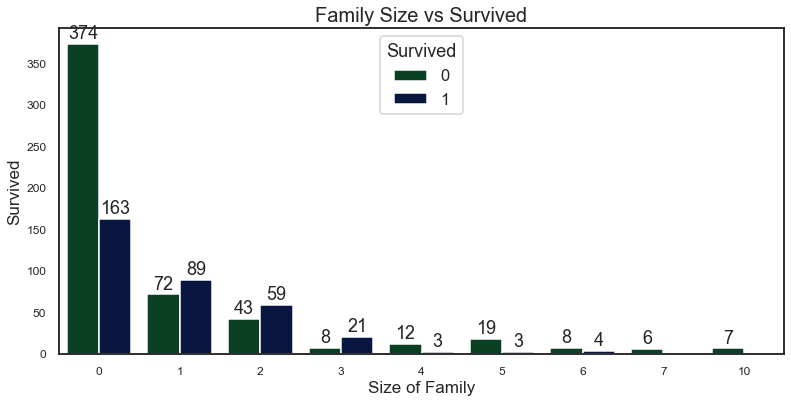

In [74]:
#ax = sns.countplot(data=train, x='FamilySize',hue='Survived')

sns.set_context('talk')
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.countplot(x=training['FamilySize'], hue=training['Survived'])
plt.bar_label(ax.containers[0], padding=1, label_type='edge')
plt.bar_label(ax.containers[1], padding=1, label_type='edge')

plt.xlabel('Size of Family', fontsize=17)
plt.xticks(rotation='horizontal', fontsize=12)

plt.ylabel('Survived', fontsize=17)
plt.yticks(size=12)

plt.title('Family Size vs Survived', fontsize=20)
print('Count plot showing size of familes that survived and those that did not.')

<Figure size 864x432 with 0 Axes>

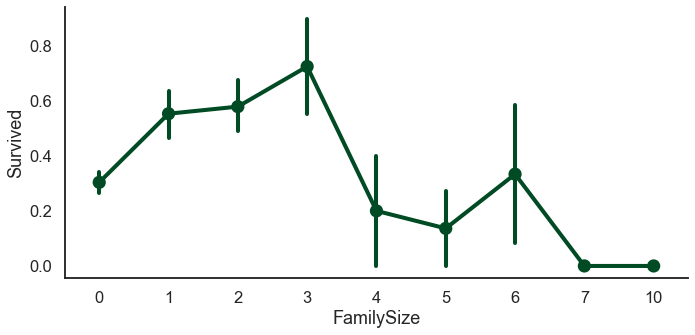

In [75]:
# Lets try to look at this data in different way using a catplot.
sns.set_context('talk')
plt.figure(figsize=(12,6))
sns.catplot(x='FamilySize',y='Survived',data=training, kind='point',
           height=5, aspect=2)

**Remarks:**

   * A family size of 1-3 increased odds of survivng.

In [76]:
training.drop(columns=['Parch','SibSp'],inplace=True)
test.drop(columns=['Parch','SibSp'],inplace=True)

## Predictive Modeling

Now that we have explored out data along with cleaning up any missing values, changed some features around we can now build different predictive models.

**What is a predictive model?** 

They use the data to "predict" the future, by analyzing relationships, correlations etc to determine how things might play out based on these factors. This is how we will predict who survived, factoring all those features we looked into data.

Here are the popular supervised machine learning alorgithms we will test and see is best for our data:

    

   * Logistic Regression

   * Support Vector Machines

   * Random Forest

   * K-Nearest Neighbours

   * Naive Bayes

   * Decision Tree

In [77]:
# Import all the required machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV

In [78]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(training.drop(['Survived'],axis=1),
                                                    training['Survived'],
                                                    test_size=.20, random_state=80, shuffle=True)
print("Data split successfully in training and test sets.")

Data split successfully in training and test sets.


In [79]:
# Make sure the data is split correctly
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (712, 6)
y_train shape: (712,)
X_test shape: (179, 6)
y_test shape: (179,)


In [80]:
# Logistic Regression Prediction
l_reg = LogisticRegression(random_state=42)
l_reg.fit(X_train, y_train)
y_predict = l_reg.predict(X_test)
print('Logistic Regression: ',metrics.accuracy_score(y_test, y_predict))

Logistic Regression:  0.770949720670391


In [81]:
# Support Vector Machine Prediction
supvm = SVC(random_state=42)
supvm.fit(X_train, y_train)
svm_pred = supvm.predict(X_test)
print('Support Vector Machine: ',metrics.accuracy_score(y_test, svm_pred))

Support Vector Machine:  0.6256983240223464


In [82]:
# Random Forest Prediction
r_forest = RandomForestClassifier(random_state=42)
r_forest.fit(X_train, y_train)
rf_pred = r_forest.predict(X_test)
print('Random Forests: ', metrics.accuracy_score(rf_pred, y_test))

Random Forests:  0.8212290502793296


In [83]:
# Decision Tree Prediction
# Initalize DecisionTree Model
boatTree = DecisionTreeClassifier(random_state=42)
# Fit the X and y data
boatTree.fit(X_train, y_train)
# Prediction using test data
predTree = boatTree.predict(X_test)
print('Decision Tree Accuracy: ',metrics.accuracy_score(y_test, predTree))

Decision Tree Accuracy:  0.7653631284916201


In [84]:
# Naive Bayes
n_bayes = GaussianNB()
n_bayes.fit(X_train, y_train)
nb_pred = n_bayes.predict(X_test)
print('Naive Bayes: ', metrics.accuracy_score(y_test, nb_pred))

Naive Bayes:  0.7486033519553073


In [85]:
# K-Nearest Neighbors (KNN)
kneighbor = KNeighborsClassifier(n_neighbors=42)
kneighbor.fit(X_train, y_train)
k_pred = kneighbor.predict(X_test)
print('KNN: ', metrics.accuracy_score(y_test, k_pred))

KNN:  0.6480446927374302


### Model Evaluation

**Random Forests** has the best accuracy score so we will continue to use this alorgithm and try and beat a prediction better than 81 percent.

In [86]:
print('Random Forests: ', metrics.accuracy_score(rf_pred, y_test))

Random Forests:  0.8212290502793296


In [87]:
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print('\n')
print("Classification Report:\n", classification_report(y_test, rf_pred))

Confusion Matrix:
 [[92 15]
 [17 55]]


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       107
           1       0.79      0.76      0.77        72

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



### Find the best Parameter's for this model

##### Create a grid of parameters and use RandomizedSearchCV

This I got from here: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

In [88]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [89]:
# Use the grid above to find the best hyperparameters
# Create another base model for comparision
rf = RandomForestClassifier()
# Search for the best paramets using 3 fold cross validation
rf_rand = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                            n_iter=100, cv=5, verbose=2, random_state=42, n_jobs=-1)


full_X_train = pd.concat([X_train, X_test])
full_y_train = pd.concat([y_train, y_test])
rf_rand.fit(full_X_train, full_y_train)

# View the results
best_params = rf_rand.best_params_
print(f"Best parameters: {best_params}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'n_estimators': 600, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': False}


In [90]:
# Use the best parameters and give out score.
rf_best_params = RandomForestClassifier(**best_params)
rf_best_params.fit(full_X_train, full_y_train)
pred = rf_best_params.predict(X_test)



print('----------------------------------------------------------------------------')

print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print('\n')
print("Classification Report:\n", classification_report(y_test, pred))

print('----------------------------------------------------------------------------')

print(f'Test Data Accuracy : {rf_best_params.score(X_test, y_test)}')
print('\n')
print(f'Training Data Accuracy : {rf_best_params.score(X_train, y_train)}')

print('----------------------------------------------------------------------------')

----------------------------------------------------------------------------
Confusion Matrix:
 [[99  8]
 [11 61]]


Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91       107
           1       0.88      0.85      0.87        72

    accuracy                           0.89       179
   macro avg       0.89      0.89      0.89       179
weighted avg       0.89      0.89      0.89       179

----------------------------------------------------------------------------
Test Data Accuracy : 0.8938547486033519


Training Data Accuracy : 0.9129213483146067
----------------------------------------------------------------------------


### Future Improvements to model

### Feature Importance

Using Scikit-Learn to provide a list showing up the variables and their importance to the model.

Well use the Scikit-Learn library RandomForestRegressor

In [91]:
# Import the library
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz
import pydot

In [92]:
# # Create the model for Importance
rf_important = RandomForestRegressor(n_estimators=100, random_state=100) 
rf_important.fit(X_train, y_train)

RandomForestRegressor(random_state=100)

**Interpert the current results**

In [93]:
# Copy of train set, just to be safe and not break anything
train_improved= training
test_improved = testing

In [94]:
# Create a list of the features
# Use np to convert arrays
labels = np.array(train_improved['Survived'])
# Remove the labels from the features
features = train_improved.drop('Survived', axis=1)
# Saving the feature names
features_list = list(features)
# Convert to np array | .fit() cannot will not work otherwise
features = np.array(features)

In [95]:
# Visualise a Tree
tree = rf_important.estimators_[5]

# Export the png to dot.file
export_graphviz(tree, out_file='tree.dot', feature_names=
               features_list,
               rounded= True,
               precision= 1)

In [96]:
# Use file to create chart and write to a file
(graph,) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')

In [97]:
# Downsize the size of tree for viewing
rf_smaller = RandomForestRegressor(n_estimators=10, max_depth=3)
rf_smaller.fit(features, labels)

# Extract the small tree
small_tree = rf_smaller.estimators_[5]

# Save the tree as a png image
export_graphviz(small_tree, out_file= 'small_tree.dot',
               feature_names=features_list, rounded=True,
               precision=1)

# Use file to create chart and write to a file
(graph,) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')

#### Variable Importance

In [98]:
# The relative importances of the variables
## Get numerical feature_importances
importances = list(rf_important.feature_importances_)

# List tuples w/ variables and their importance level
feature_importances = [(features, round(importances, 2)) for features,
                      importances in zip(features_list, importances)]

# Sort feature importances by greatest first
feature_importances = sorted(feature_importances, key= lambda x:
                            x[1], reverse=True)

# Print results
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

print("Compare this to graph")

Variable: Sex                  Importance: 0.31
Variable: Age                  Importance: 0.26
Variable: Fare                 Importance: 0.18
Variable: Pclass               Importance: 0.12
Variable: FamilySize           Importance: 0.09
Variable: Embarked             Importance: 0.04
Compare this to graph


Viz of Important Features


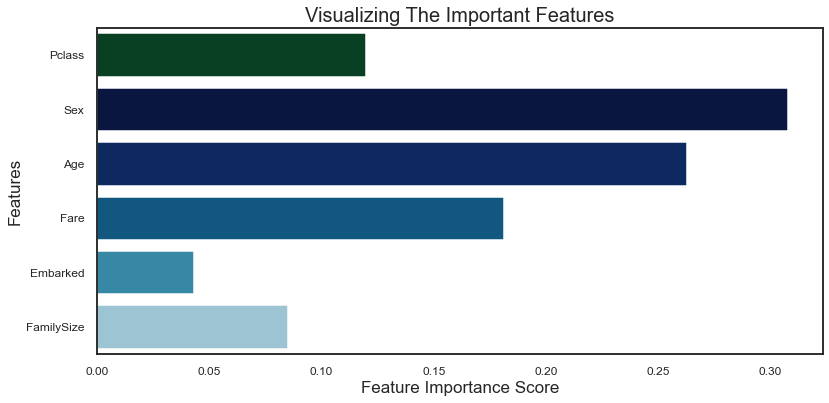

In [99]:
sns.set_context('talk')
fig, ax = plt.subplots(figsize=(13,6))
ax = sns.barplot(x=importances, y=features_list)

plt.xlabel('Feature Importance Score', fontsize=17)
plt.xticks(rotation='horizontal', fontsize=12)

plt.ylabel('Features', fontsize=17)
plt.yticks(size=12)

plt.title('Visualizing The Important Features', fontsize=20)
print("Viz of Important Features")

### Submission

In [100]:
# test_for_pred = testing
# test_for_pred.drop(['PassengerId'],axis=1,inplace=True)
# test_for_pred = rf_best_params.predict(test_for_pred)

In [101]:
# submission = pd.DataFrame({
#     "PassengerId": test_df["PassengerId"],
#      "Survived": test_for_pred
# })
# submission.to_csv("my_submission.csv",index=False)
# print("Your submission was successful!")

In [102]:
test_for_pred = testing
test_for_pred.drop(['PassengerId'],axis=1,inplace=True)
test_for_pred = rf_best_params.predict(test_for_pred)

In [103]:
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
     "Survived": test_for_pred
})
submission.to_csv("my_submission.csv",index=False)
print("Your submission was successful!")

Your submission was successful!


Only getting 75 percent accuracy, need to improve the model
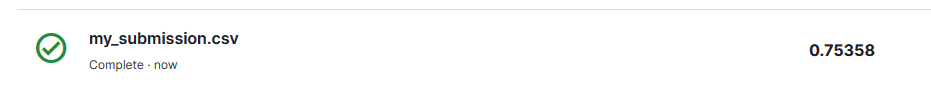